
#**Henry Demétrio - 22010597**

#**Rodrigo Andrino - 22006764**




In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

O dataset a seguir, disponível no Canvas e no GitHub, tem seis séries temporais para:
- Encontrar o modelo da série por fitting de curvas clássicas
- Fazer forecasting para o próximo valor de y (utilizando próximo valor de x).

- **Importação do arquivo pelo GitHub**

# ***SÉRIE Y1***

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/MiroPlacido/Datasets/main/seriesfitting.csv")
df.head(10)

,Unnamed: 0,Time,y1,y2,y3,y4,y5,y6
0,0,1,164,14,27,94,7,66
1,1,2,160,26,11,72,13,83
2,2,3,176,38,4,55,16,106
3,3,4,171,44,6,46,21,139
4,4,5,187,46,6,27,31,159
5,5,6,208,55,9,26,41,198
6,6,7,204,59,14,19,46,228
7,7,8,222,60,29,17,44,300


In [32]:
x = np.array(df.Time)
y = np.array(df.y1)

In [33]:
x

array([1, 2, 3, 4, 5, 6, 7, 8])

In [34]:
y

array([164, 160, 176, 171, 187, 208, 204, 222])

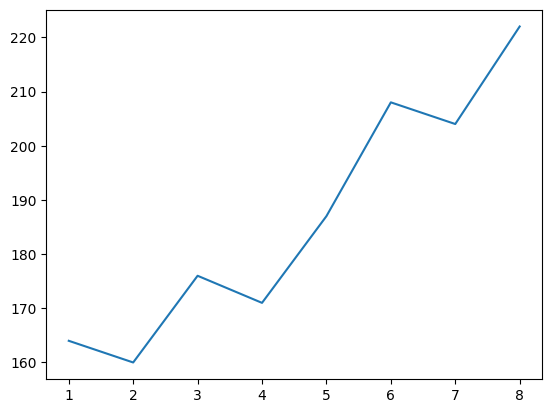

In [36]:
plt.plot(x,y)
plt.show()

SSE = 346.07
MSE = 43.26
b0 = 146.96
b1 = 8.79


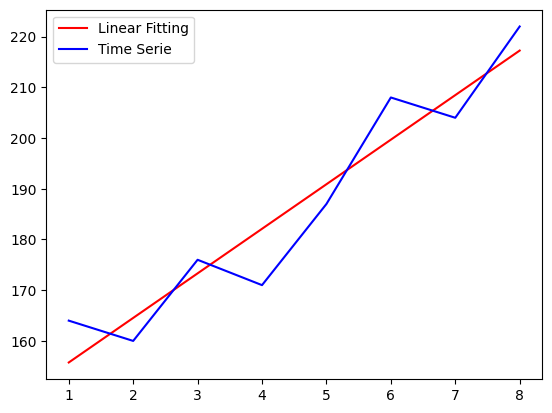

In [38]:
def f(x,b0,b1):
  y = b0 + b1*x
  return y

guess = [1,1]

params, params_covariance = optimize.curve_fit(f,x,y,guess)

b0 = params[0]
b1 = params[1]

y_fit = f(x,b0,b1)
SSE = sum((y-y_fit)**2)
MSE = sum((y-y_fit)**2)/len(x)

plt.plot(x, y_fit, color="red", label="Linear Fitting")
plt.plot(x, y, color="blue", label="Time Serie")
plt.legend(loc='best')
print("SSE =", SSE.round(2))
print("MSE =", MSE.round(2))

# Print dos parâmetros
print("b0 =", b0.round(2))
print("b1 =", b1.round(2))

In [39]:
y_forecast = f(9, b0, b1)
print(y_forecast.round(1))

226.0


# ***SÉRIE Y2***

In [40]:
x = np.array(df.Time)
y2 = np.array(df.y2)

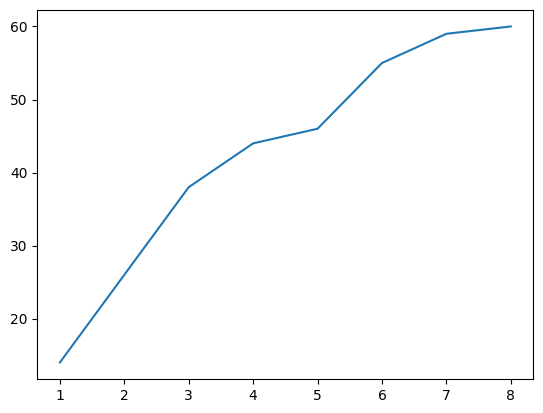

In [41]:
plt.plot(x,y2)
plt.show()

In [43]:
# regra log:
def f(x,b0,b1,b2,b3):
  y2 = b0 + b1*np.log(b2*x + b3)
  return y2

<ipython-input-52-f39fa80e94ce>:3: RuntimeWarning: invalid value encountered in log
  y2 = b0 + b1*np.log(b2*x + b3)


SSE = 18.34
MSE = 2.29
b0 = -78.84
b1 = 28.72
b2 = 15.09
b3 = 10.03


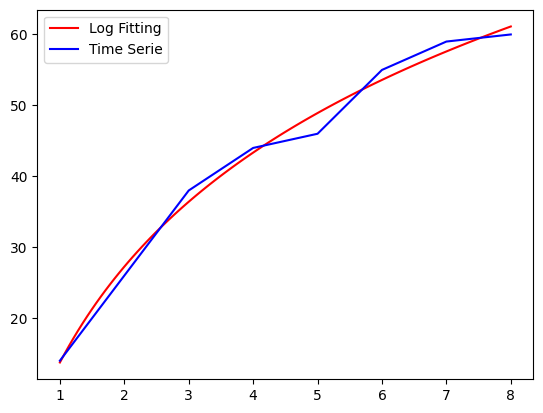

In [52]:
# Função para o modelo
def f(x,b0,b1,b2,b3):
  y2 = b0 + b1*np.log(b2*x + b3)
  return y2

# Chute inicial
guess = [1,1, 1, 1]

# Fitting do modelo
params, params_covariance = optimize.curve_fit(f,x,y2,guess)

# Parâmetros
b0 = params[0]
b1 = params[1]
b2 = params[2]
b3 = params[3]

# Calculando as métricas do modelo
y_fit = f(x,b0,b1,b2,b3)
SSE = sum((y2-y_fit)**2)
MSE = sum((y2-y_fit)**2)/len(x)

# Refinando x e y da curva fitada
x_fine = np.linspace(min(x), max(x), 100)
y_fine = f(x_fine, b0, b1, b2,b3)


# Plotando os pontos, a CURVA ajustada e a métrica SSE
plt.plot(x_fine, y_fine, color="red", label="Log Fitting")
plt.plot(x, y2, color="blue", label="Time Serie")
plt.legend(loc='best')
print("SSE =", SSE.round(2))
print("MSE =", MSE.round(2))

# Print dos parâmetros
print("b0 =", b0.round(2))
print("b1 =", b1.round(2))
print("b2 =", b2.round(2))
print("b3 =", b3.round(2))


In [48]:
y_forecast2 = f(9, b0, b1, b2, b3)
print(y_forecast2.round(1))

64.3


# ***SÉRIE 3***

In [49]:
x = np.array(df.Time)
y3 = np.array(df.y3)

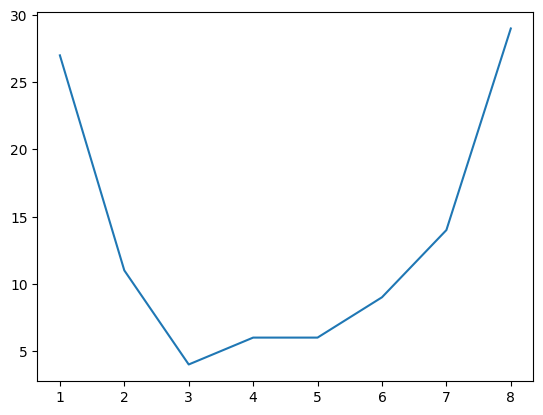

In [50]:
plt.plot(x,y3)
plt.show()

SSE = 38.05
MSE = 4.76
b0 = 39.29
b1 = -16.51
b2 = 1.89


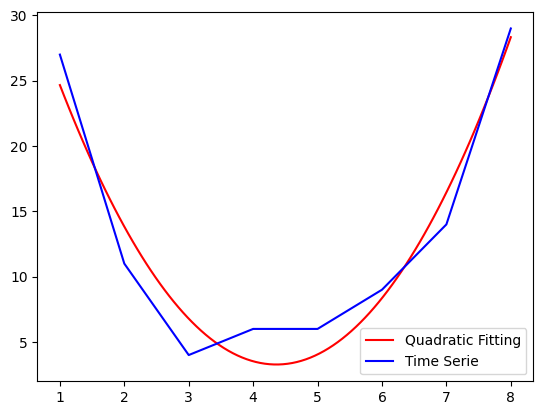

In [58]:
# Função para o modelo
def f(x,b0,b1,b2):
  y3 = b0 + b1*x + b2*x**2
  return y3

# Chute inicial
guess = [1,1,1]

# Fitting do modelo
params, params_covariance = optimize.curve_fit(f,x,y3,guess)

# Parâmetros
b0 = params[0]
b1 = params[1]
b2 = params[2]

# Calculando as métricas do modelo
y_fit = f(x,b0,b1,b2)
SSE = sum((y3-y_fit)**2)
MSE = sum((y3-y_fit)**2)/len(x)

# Refinando x e y da curva fitada
x_fine = np.linspace(min(x), max(x), 100)
y_fine = f(x_fine, b0, b1, b2)


# Plotando os pontos, a CURVA ajustada e a métrica SSE
plt.plot(x_fine, y_fine, color="red", label="Quadratic Fitting")
plt.plot(x, y3, color="blue", label="Time Serie")
plt.legend(loc='best')
print("SSE =", SSE.round(2))
print("MSE =", MSE.round(2))

# Print dos parâmetros
print("b0 =", b0.round(2))
print("b1 =", b1.round(2))
print("b2 =", b2.round(2))

In [59]:
y_forecast = f(9, b0, b1, b2)
print(y_forecast.round(1))

44.0


# ***SÉRIE 4***

In [65]:
x = np.array(df.Time)
y4 = np.array(df.y4)

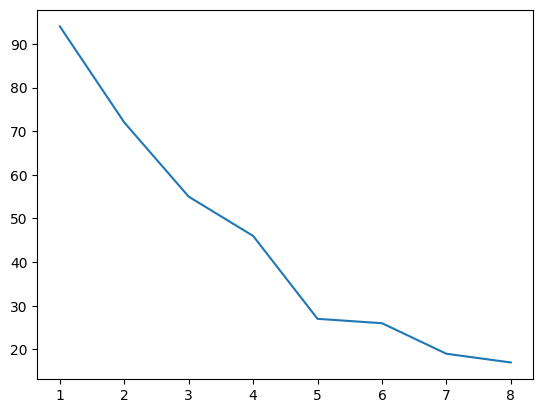

In [66]:
plt.plot(x,y4)
plt.show()

<ipython-input-74-24a42b5eca9a>:3: RuntimeWarning: overflow encountered in exp
  y4 = b0 + b1*np.exp(b2*x)


SSE = 48.34
MSE = 6.04
b0 = 2.97
b1 = 121.38
b2 = -0.28


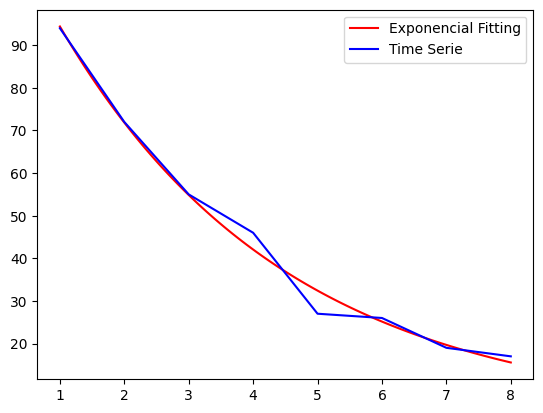

In [74]:
# Função para o modelo
def f(x,b0,b1,b2):
  y4 = b0 + b1*np.exp(b2*x)
  return y4

# Chute inicial
guess = [1,1, -1]

# Fitting do modelo
params, params_covariance = optimize.curve_fit(f,x,y4,guess)

# Parâmetros
b0 = params[0]
b1 = params[1]
b2 = params[2]

# Calculando as métricas do modelo
y_fit = f(x,b0,b1,b2)
SSE = sum((y4-y_fit)**2)
MSE = sum((y4-y_fit)**2)/len(x)

# Refinando x e y da curva fitada
x_fine = np.linspace(min(x), max(x), 100)
y_fine = f(x_fine, b0, b1, b2)


# Plotando os pontos, a CURVA ajustada e a métrica SSE
plt.plot(x_fine, y_fine, color="red", label="Exponencial Fitting")
plt.plot(x, y4, color="blue", label="Time Serie")
plt.legend(loc='best')
print("SSE =", SSE.round(2))
print("MSE =", MSE.round(2))

# Print dos parâmetros
print("b0 =", b0.round(2))
print("b1 =", b1.round(2))
print("b2 =", b2.round(2))

In [77]:
y_forecast4 = f(9, b0, b1, b2)
print(y_forecast4.round(1))

12.5


# ***SÉRIE 5***

In [75]:
x = np.array(df.Time)
y5 = np.array(df.y5)

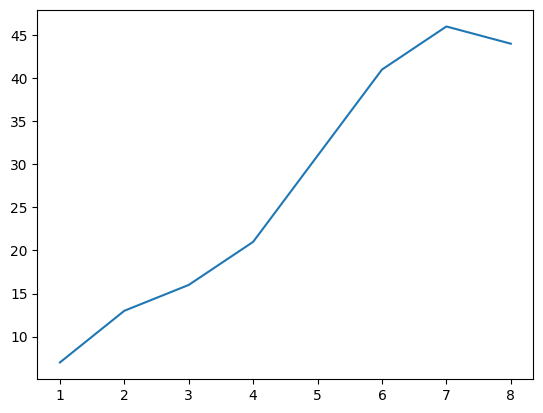

In [76]:
plt.plot(x,y5)
plt.show()

SSE = 23.72
MSE = 2.96
b0 = 12.64
b1 = -7.57
b2 = 3.69
b3 = -0.28


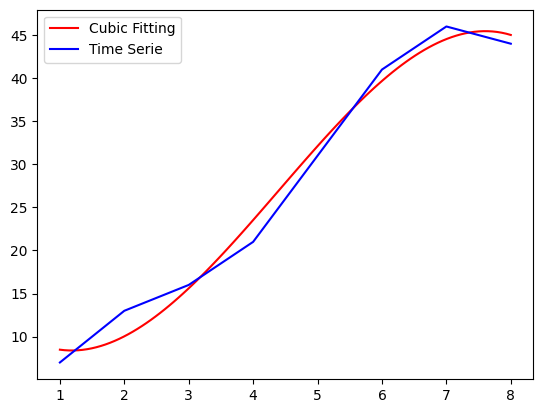

In [78]:
# Função para o modelo
def f(x,b0,b1,b2, b3):
  y5 = b0 + b1*x + b2*x**2 + b3*x**3
  return y5

# Chute inicial
guess = [1,1, 1, 1]

# Fitting do modelo
params, params_covariance = optimize.curve_fit(f,x,y5,guess)

# Parâmetros
b0 = params[0]
b1 = params[1]
b2 = params[2]
b3 = params[3]

# Calculando as métricas do modelo
y_fit = f(x,b0,b1,b2,b3)
SSE = sum((y5-y_fit)**2)
MSE = sum((y5-y_fit)**2)/len(x)

# Refinando x e y da curva fitada
x_fine = np.linspace(min(x), max(x), 100)
y_fine = f(x_fine, b0, b1, b2, b3)


# Plotando os pontos, a CURVA ajustada e a métrica SSE
plt.plot(x_fine, y_fine, color="red", label="Cubic Fitting")
plt.plot(x, y5, color="blue", label="Time Serie")
plt.legend(loc='best')
print("SSE =", SSE.round(2))
print("MSE =", MSE.round(2))

# Print dos parâmetros
print("b0 =", b0.round(2))
print("b1 =", b1.round(2))
print("b2 =", b2.round(2))
print("b3 =", b3.round(2))


In [79]:
y_forecast5 = f(9, b0, b1, b2, b3)
print(y_forecast5.round(1))

39.4


# ***SÉRIE 6***

In [80]:
x = np.array(df.Time)
y6 = np.array(df.y6)

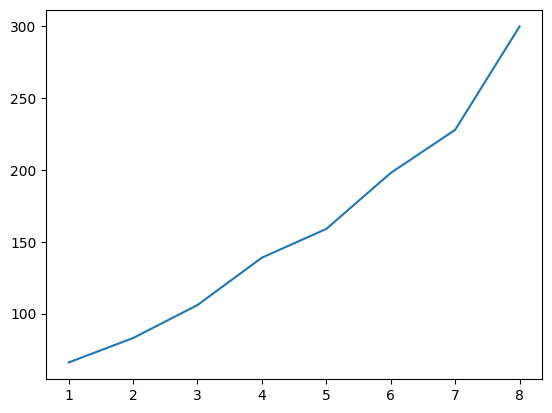

In [82]:
plt.plot(x,y6)
plt.show()

SSE = 284.62
MSE = 35.58
b0 = -11.29
b1 = 65.61
b2 = 0.19


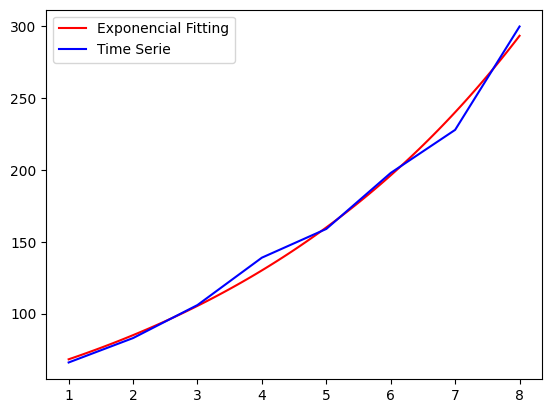

In [84]:
# Função para o modelo
def f(x,b0,b1,b2):
  y6 = b0 + b1*np.exp(b2*x)
  return y6

# Chute inicial
guess = [1,1, 1]

# Fitting do modelo
params, params_covariance = optimize.curve_fit(f,x,y6,guess)

# Parâmetros
b0 = params[0]
b1 = params[1]
b2 = params[2]

# Calculando as métricas do modelo
y_fit = f(x,b0,b1,b2)
SSE = sum((y6-y_fit)**2)
MSE = sum((y6-y_fit)**2)/len(x)

# Refinando x e y da curva fitada
x_fine = np.linspace(min(x), max(x), 100)
y_fine = f(x_fine, b0, b1, b2)


# Plotando os pontos, a CURVA ajustada e a métrica SSE
plt.plot(x_fine, y_fine, color="red", label="Exponencial Fitting")
plt.plot(x, y6, color="blue", label="Time Serie")
plt.legend(loc='best')
print("SSE =", SSE.round(2))
print("MSE =", MSE.round(2))

# Print dos parâmetros
print("b0 =", b0.round(2))
print("b1 =", b1.round(2))
print("b2 =", b2.round(2))

In [86]:
y_forecast6 = f(9, b0, b1, b2)
print(y_forecast6.round(1))

358.0
